In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colormaps
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [22]:
# Load train and test datasets
train_data = pd.read_csv('mobile-phone-price/train.csv')
test_data = pd.read_csv('mobile-phone-price/test.csv')

In [23]:
# Drop 'id' column from the test dataset
test_data = test_data.drop('id', axis=1)

In [24]:
# Understand training data at a high level
train_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [25]:
# Understand testing data at a high level
test_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,4.328000,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,2.288155,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,1.000000,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,2.000000,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,4.000000,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,6.000000,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,8.000000,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [41]:
# Separate features and target variable for training data
X_train = train_data.drop('price_range', axis=1)
y_train = train_data['price_range']

In [42]:
# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [43]:
X_train_scaled

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.55964063,
         0.99401789,  0.98609664]])

In [46]:
# Initialize and train the logistic regression model

# LBFGS solver
model_lbfgs = LogisticRegression(solver='lbfgs', max_iter=1000)
model_lbfgs.fit(X_train_scaled, y_train)

# Liblinear solver
model_liblinear = LogisticRegression(solver='liblinear', max_iter=1000)
model_liblinear.fit(X_train_scaled, y_train)

# SAG solver
model_sag = LogisticRegression(solver='sag', max_iter=1000)
model_sag.fit(X_train_scaled, y_train)

# SAGA solver
model_saga = LogisticRegression(solver='saga', max_iter=1000)
model_saga.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, solver='saga')

In [47]:
# Evaluate model accuracy using cross-validation
accuracy_scores_lbfgs = cross_val_score(model_lbfgs, X_train_scaled, y_train, cv=5)
accuracy_scores_liblinear = cross_val_score(model_liblinear, X_train_scaled, y_train, cv=5)
accuracy_scores_sag = cross_val_score(model_sag, X_train_scaled, y_train, cv=5)
accuracy_scores_saga = cross_val_score(model_saga, X_train_scaled, y_train, cv=5)

In [48]:
print("Cross-Validation Accuracy Scores (LBFGS Solver):", accuracy_scores_lbfgs)
print("Mean Accuracy:", accuracy_scores_lbfgs.mean())

Cross-Validation Accuracy Scores (LBFGS Solver): [0.96   0.955  0.9675 0.9625 0.9675]
Mean Accuracy: 0.9625


In [49]:
print("Cross-Validation Accuracy Scores (Liblinear Solver):", accuracy_scores_liblinear)
print("Mean Accuracy:", accuracy_scores_liblinear.mean())

Cross-Validation Accuracy Scores (Liblinear Solver): [0.825  0.83   0.8575 0.8625 0.805 ]
Mean Accuracy: 0.836


In [50]:
print("Cross-Validation Accuracy Scores (SAG Solver):", accuracy_scores_sag)
print("Mean Accuracy:", accuracy_scores_sag.mean())

Cross-Validation Accuracy Scores (SAG Solver): [0.96   0.955  0.9675 0.9625 0.9675]
Mean Accuracy: 0.9625


In [51]:
print("Cross-Validation Accuracy Scores (SAGA Solver):", accuracy_scores_saga)
print("Mean Accuracy:", accuracy_scores_saga.mean())

Cross-Validation Accuracy Scores (SAGA Solver): [0.96   0.955  0.9675 0.9625 0.9675]
Mean Accuracy: 0.9625


In [31]:
# Get feature names
feature_names = X_train.columns

In [67]:
# Extract coefficients
model_lbfgs.fit(X_train_scaled, y_train)  # Train the model on the entire training data
coefficients = model_lbfgs.coef_[0]

# model_liblinear.fit(X_train_scaled, y_train)  # Train the model on the entire training data
# coefficients = model_liblinear.coef_[0]

# model_sag.fit(X_train_scaled, y_train)  # Train the model on the entire training data
# coefficients = model_sag.coef_[0]

# model_saga.fit(X_train_scaled, y_train)  # Train the model on the entire training data
# coefficients = model_saga.coef_[0]

In [68]:
# Create a DataFrame to store coefficients and corresponding feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

In [69]:
# Sort coefficients by absolute value
coefficients_df['AbsoluteCoefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='AbsoluteCoefficient', ascending=False)

In [70]:
# Plot RAM values for each price range
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

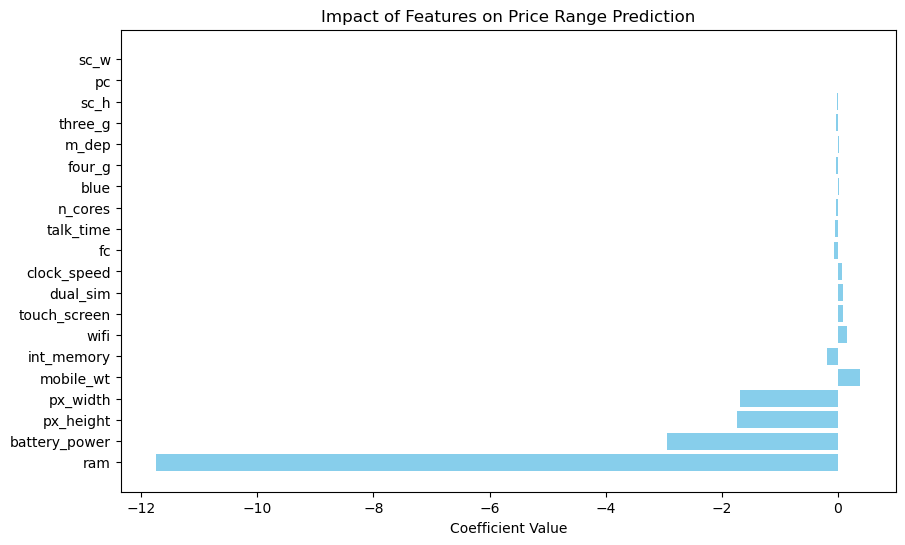

In [71]:
# Plot coefficients
plt.figure(figsize=(10, 6))
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Impact of Features on Price Range Prediction')
plt.show()

In [17]:
# Create a correlation matrix
correlation_matrix = train_data.corr()

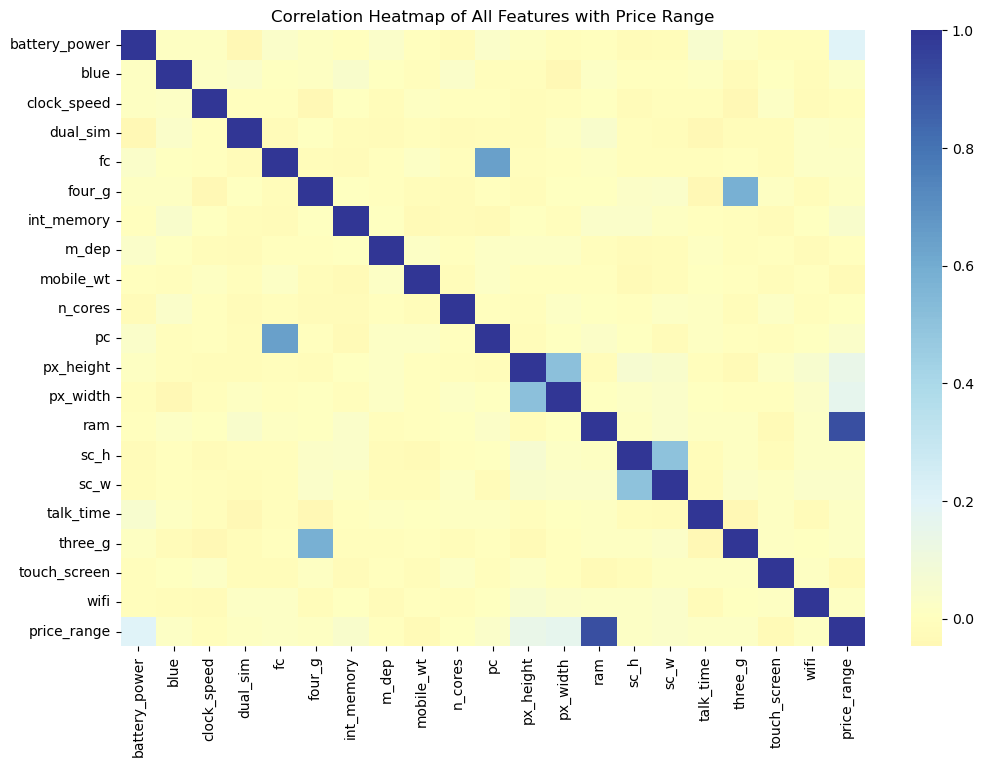

In [18]:
# Plot heatmap for all features
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="RdYlBu", center=0)
plt.title('Correlation Heatmap of All Features with Price Range')
plt.show()

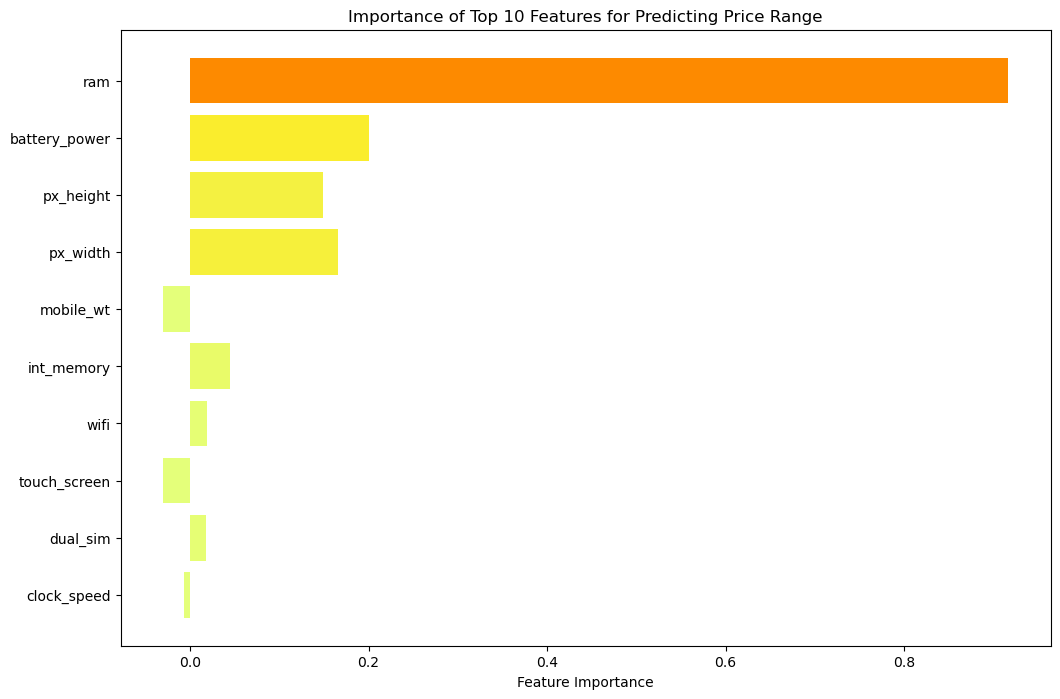

In [19]:
# Extract the top features (e.g., top 10)
top_ten_features = coefficients_df['Feature'][:10]

# Initialize a figure and axis
plt.figure(figsize=(12, 8))
ax = plt.gca()

# Define colormap
cmap = plt.get_cmap('Wistia')

# Plot the importance of each feature for each price range
for i, feature in enumerate(top_ten_features):
    # Calculate the importance of the feature for each price range
    importance = correlation_matrix.loc['price_range', feature]
    
    # Map the importance value to a color using the colormap
    color = cmap(importance)
    
    # Plot a horizontal bar for each feature with color gradient
    ax.barh(i, importance, color=color)

# Customize plot
ax.set_yticks(range(len(top_ten_features)))
ax.set_yticklabels(top_ten_features)
ax.set_xlabel('Feature Importance')
ax.set_title('Importance of Top 10 Features for Predicting Price Range')
ax.invert_yaxis()

# Show plot
plt.show()